## Preliminary analysis

This notebook analyzes the MTA subway data for the week of June 10-17, 2017 that can be found here:

http://web.mta.info/developers/turnstile.html

1.Download that SAME file and read it in below. View the first few rows.

In [5]:
#insert 1
import pandas as pd
import datetime
import matplotlib.pyplot as plt
sub_raw = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170617.txt')
sub_raw.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,00:00:00,REGULAR,6215258,2104297
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,04:00:00,REGULAR,6215284,2104303
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,08:00:00,REGULAR,6215318,2104337
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,12:00:00,REGULAR,6215475,2104417
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,16:00:00,REGULAR,6215841,2104465


2.What are the column names?

In [6]:
#insert 2
sub_raw.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

3.We can see that there is a lot of whitespace at the end of the exits column name. Let's strip that whitespace:

In [7]:
#insert 3
sub_raw.columns = sub_raw.columns.str.strip()
sub_raw.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

4.How big is the data set?

In [8]:
#insert 4
sub = sub_raw
sub.shape

(197209, 11)

5.How many unique stations are there? What are they? Answer each of these questions in one line each.

In [9]:
#insert 5
print(len(sub['STATION'].unique()))
sub['STATION'].unique()

376


array(['59 ST', '5 AV/59 ST', '57 ST-7 AV', '49 ST', 'TIMES SQ-42 ST',
       '34 ST-HERALD SQ', '28 ST', '23 ST', '14 ST-UNION SQ', '8 ST-NYU',
       'PRINCE ST', 'CANAL ST', 'CITY HALL', 'CORTLANDT ST', 'RECTOR ST',
       'WHITEHALL S-FRY', 'DELANCEY/ESSEX', 'BOWERY', 'CHAMBERS ST',
       'FULTON ST', 'BROAD ST', '7 AV', 'PARK PLACE', 'BOTANIC GARDEN',
       'PROSPECT PARK', 'PARKSIDE AV', 'CHURCH AV', 'BEVERLEY ROAD',
       'CORTELYOU RD', 'NEWKIRK PLAZA', 'AVENUE H', 'AVENUE J',
       'AVENUE M', 'KINGS HWY', 'AVENUE U', 'NECK RD', 'SHEEPSHEAD BAY',
       'BRIGHTON BEACH', 'OCEAN PKWY', 'BOROUGH HALL', 'JAY ST-METROTEC',
       'DEKALB AV', 'ATL AV-BARCLAY', 'UNION ST', '4AV-9 ST', '25 ST',
       '36 ST', '45 ST', '77 ST', '86 ST', 'BAY RIDGE-95 ST', '8 AV',
       'FT HAMILTON PKY', 'NEW UTRECHT AV', '18 AV', '20 AV', 'BAY PKWY',
       '9 AV', '50 ST', '55 ST', '71 ST', '79 ST', '25 AV', 'BAY 50 ST',
       'CONEY IS-STILLW', 'W 8 ST-AQUARIUM', '6 AV', '3 AV', '1 AV',
   

6.Okay, so we understand what station represents. But what the heck are C/A, UNIT, and SCP? Keep in mind that in the larger stations, you might have multiple areas within one station that look like this:

<img src="image.jpg" style="width: 300px;"/>

Further complicating things, there are a few station names like 14TH ST that refer to more than one station location along that street.

This data set is not very well documented. Welcome to the joys of real world data science!!!

Read the following two links carefully to see other people's confusion and what information they have been able to gather:

https://groups.google.com/forum/#!topic/mtadeveloperresources/AMVx2WUY9iI

https://groups.google.com/forum/#!searchin/mtadeveloperresources/%22remote$20unit%22%7Csort:relevance/mtadeveloperresources/z8l3ZU9cY6Y/OFlHGkFAimQJ

It sounds like each C/A + UNIT + SCP + STATION combo refers to a single turnstile. How many unique turnstiles are there? 

In [10]:
#insert 6
sub['Turnstile'] = sub['STATION'] + ' ' + sub['C/A'] + ' ' + sub['UNIT'] + ' ' + sub['SCP']
len(sub['Turnstile'].unique())

4695

7.What data types are each of the columns?

In [11]:
#insert 7
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197209 entries, 0 to 197208
Data columns (total 12 columns):
C/A          197209 non-null object
UNIT         197209 non-null object
SCP          197209 non-null object
STATION      197209 non-null object
LINENAME     197209 non-null object
DIVISION     197209 non-null object
DATE         197209 non-null object
TIME         197209 non-null object
DESC         197209 non-null object
ENTRIES      197209 non-null int64
EXITS        197209 non-null int64
Turnstile    197209 non-null object
dtypes: int64(2), object(10)
memory usage: 18.1+ MB


8.We can see that the exits and entries are treated as integers but the others are all treated as objects (strings). Overwrite the time column so that it is a datetime object containing the combined date and time column info (so that the times have a chronological order). 

In [12]:
#insert 8
sub['TIME'] = pd.to_datetime(sub['DATE'] + ' ' + sub['TIME'])

9.What is the earliest and latest date in our dataset?

In [1]:
#insert 9
#sub['DATE']
# June 10, 2017 - June 16, 2017

10.If we wanted to only look at the 34st Street Penn Station stop on 6/12/2017, what would we type?

In [2]:
#insert 10
# sub_ed = sub
# sub_ed[(sub_ed['STATION'] == '34 ST-PENN STA') & (sub_ed['DATE'] == '06/12/2017')]

11.Create a dictionary called bigDict. It should contain a nested set of keys and values. The outermost key should be the tuple (C/A,UNIT,STATION) and its value should itself be a dictionary with the SCP as the key and a list of (TIME, EXITS) tuples as its values. The purpose of this section is to prepare data for later uses. It should take a little while to finish running.

In [3]:
# sub['TOTAL'] = sub['ENTRIES'] + sub['EXITS']
# sub

In [ ]:
#insert 11
from collections import defaultdict

exitdict = defaultdict(
        lambda: defaultdict(list))

for x in range(len(sub)):
    ca = sub['C/A'][x]
    unit = sub['UNIT'][x]
    station = sub['STATION'][x]
    outkey = (ca, unit, station)
    
    inkey = sub['SCP'][x]
    
    time = sub['TIME'][x]
    exits = sub['ENTRIES'][x]
    value = (time, exits)
    
    exitdict[outkey][inkey].append(value)


# exitdict

12.As an example, use the bigDict to view all of the turnstile data located at the('A037', 'R170', '14 ST-UNION SQ') area:

In [ ]:
# insert 12
exitdict[('A037', 'R170', '14 ST-UNION SQ')]

13.Create a function called inspection that takes in the (C/A,UNIT,STATION) tuple and SCP value and plots the exit counter data versus time. 

For example, the input of 
```python
inspection(('A037', 'R170', '14 ST-UNION SQ'), '05-00-00')
```
should produce an upward trending plot.

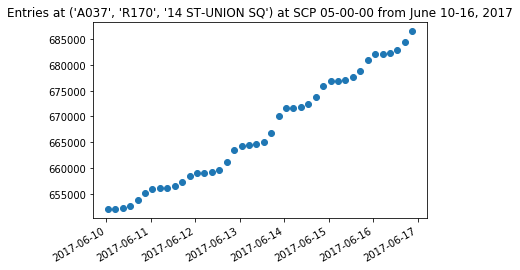

In [117]:
#insert 13
def inspection(key, scp):
    date = []
    y = []
    for i in exitdict.get(key, {}).get(scp):
        date.append(i[0])
        y.append(i[1])
    fig, ax = plt.subplots()
    ax.plot_date(date, y)
    fig.autofmt_xdate()
    plt.title(f'Entries at {key} at SCP {scp} from June 10-16, 2017')
inspection(('A037', 'R170', '14 ST-UNION SQ'), '05-00-00')
    

## Finding Data Errors
14.Due to bugs in MTA data, we will need to remove "incorrect" data. First, find the incorrect data by figuring out which turnstile counters aren't going strictly upwards. How many of these incorrect data values are there? Create a smaller dictionary callled "trouble" that contains the troublesome data from the bigDict.

In [ ]:
#insert 14
def non_decreasing(L):
    return all(x <= y for x, y in zip(L, L[1:]))

trouble = defaultdict(
        lambda: defaultdict(list))
for x in exitdict.keys():
    outkey = x
    for y in exitdict[x]:
        inkey = y
        value = exitdict[x][y]
        data = []
        for i in value:
            data.append(i[1])
        if non_decreasing(data) == False:
            trouble[outkey][inkey].append(value)

trouble

15.Using the troublesome dictionary and your inspection plotting function, plot all of the troublesome data. There are several different types of errors. What do you think is causing each type?

In [ ]:
#insert 15
# trouble.keys()
for x in trouble.keys():
    outkey = x
    for y in exitdict[x]:
        inkey = y
        inspection(x, y)

## Data Cleanup
There are three types of mistakes: decreasing, garbage values, and turnstile resets.

In [120]:
bigDict = exitdict

#### Mistake Type I: Monotone but Decreasing - To fix this, we reflect the data. 

16.Run the cell below to fix it:

Total Monotone Decrease: 39
Problem Fixed!
Total Monotone Decrease: 39
('A011', 'R080', '57 ST-7 AV') 01-00-00
('A025', 'R023', '34 ST-HERALD SQ') 01-03-01
('A025', 'R023', '34 ST-HERALD SQ') 01-03-02
('A049', 'R088', 'CORTLANDT ST') 02-05-00
('A066', 'R118', 'CANAL ST') 00-00-00
('C021', 'R212', '59 ST') 00-00-02
('H003', 'R163', '6 AV') 01-00-02
('H023', 'R236', 'DEKALB AV') 00-06-00
('J034', 'R007', '104 ST') 00-00-02
('K026', 'R100', 'METROPOLITAN AV') 00-00-01
('N063A', 'R011', '42 ST-PORT AUTH') 00-00-04
('N063A', 'R011', '42 ST-PORT AUTH') 00-00-05
('N063A', 'R011', '42 ST-PORT AUTH') 00-00-08
('N078', 'R175', '14 ST') 01-03-00
('N111', 'R284', 'CLINTON-WASH AV') 00-06-01
('N137', 'R354', '104 ST') 00-06-01
('N203', 'R195', '161/YANKEE STAD') 00-00-01
('N305', 'R017', 'LEXINGTON AV/53') 01-03-04
('N327', 'R254', 'GRAND-NEWTOWN') 00-06-01
('N342', 'R019', 'JAMAICA 179 ST') 01-03-02
('N508', 'R453', '23 ST') 00-00-02
('N600', 'R302', '57 ST') 00-06-00
('N601', 'R319', 'LEXINGTON A

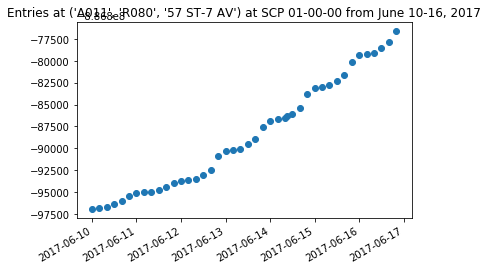

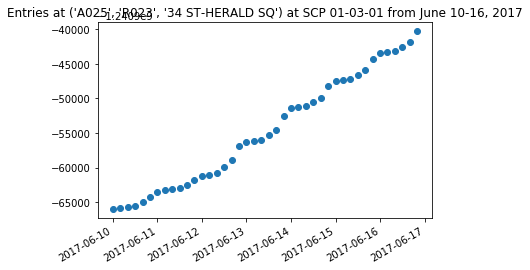

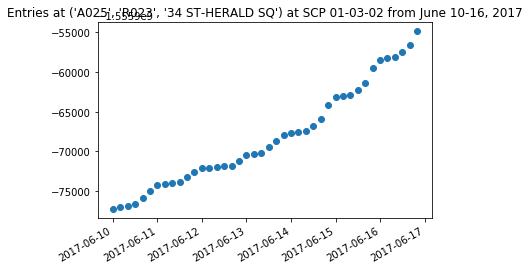

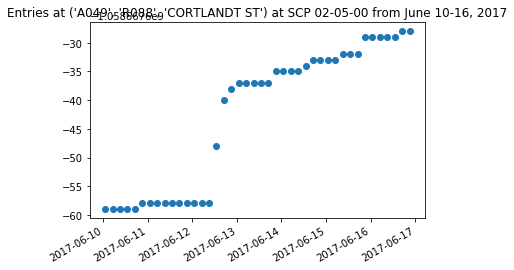

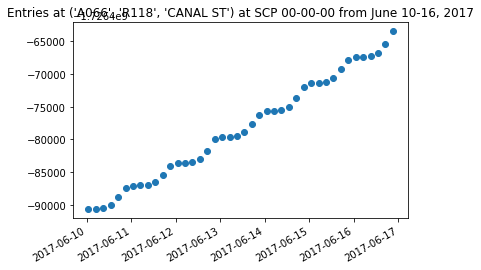

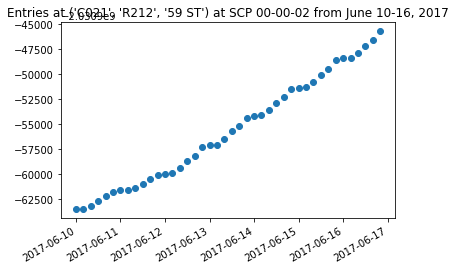

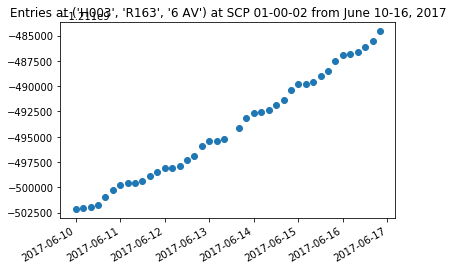

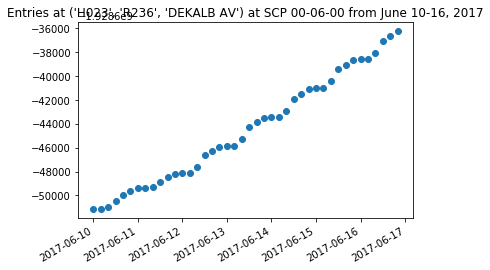

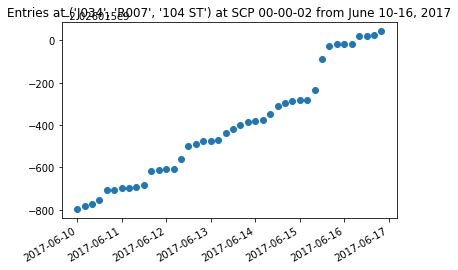

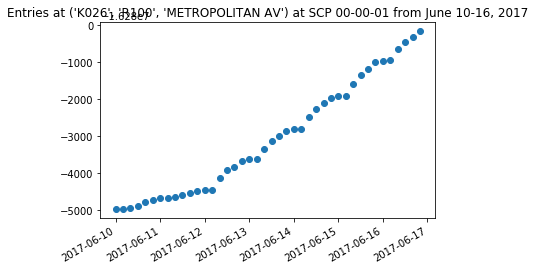

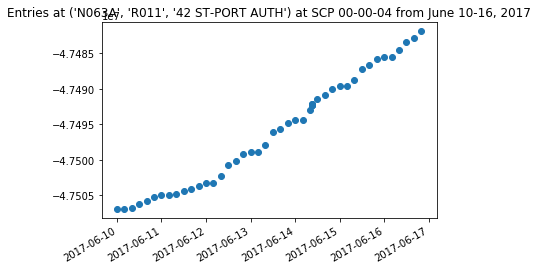

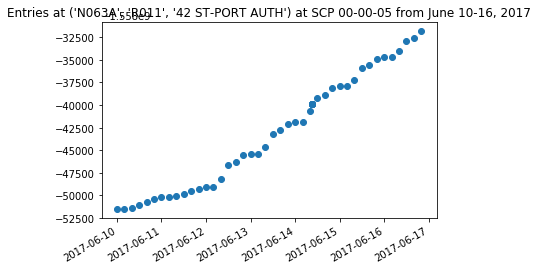

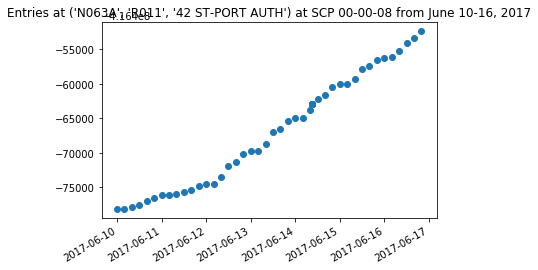

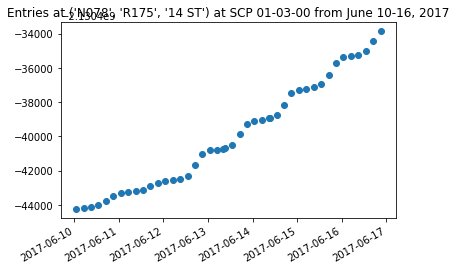

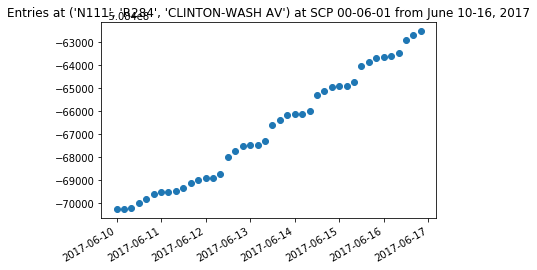

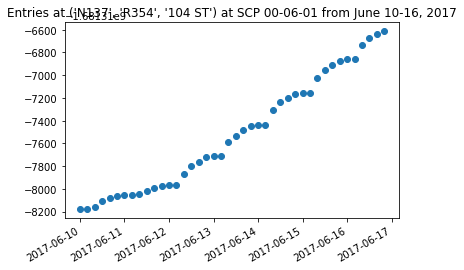

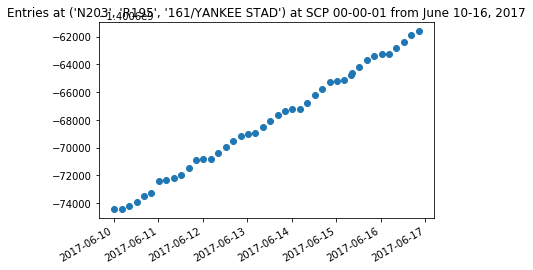

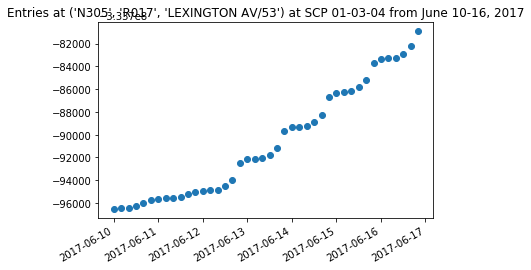

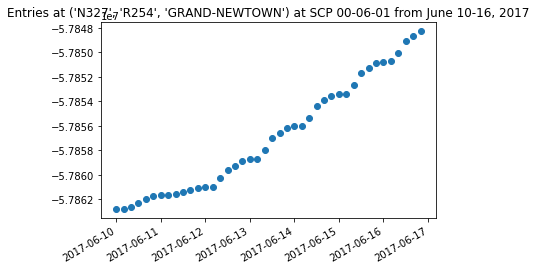

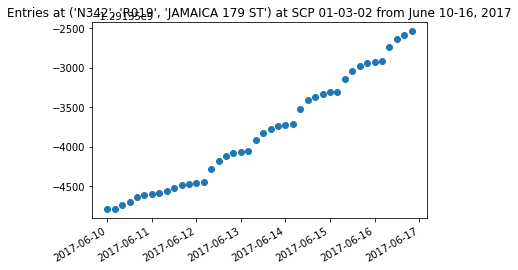

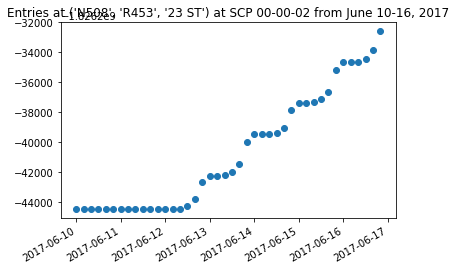

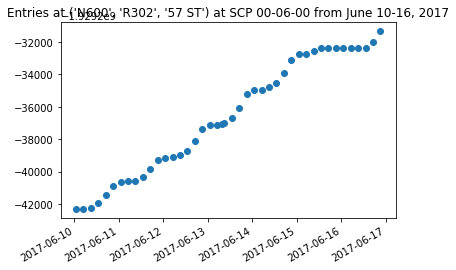

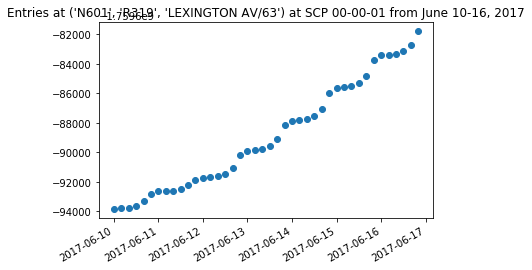

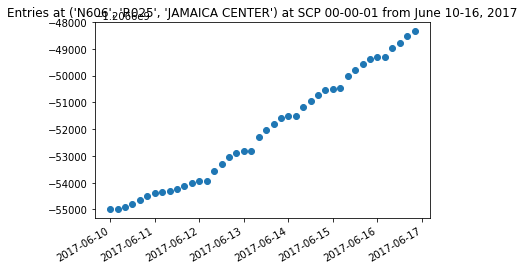

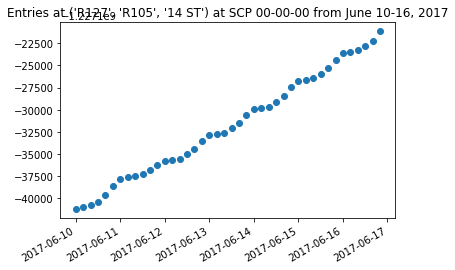

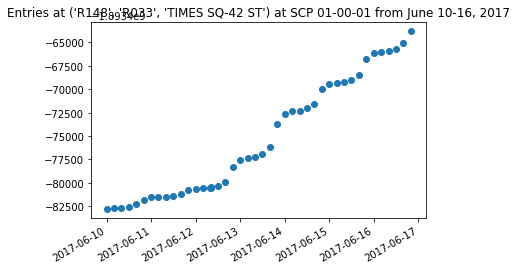

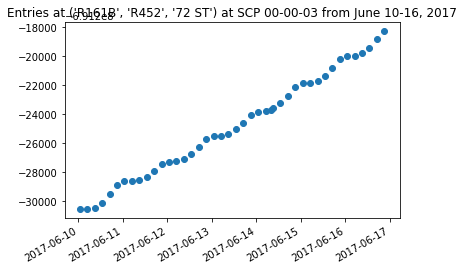

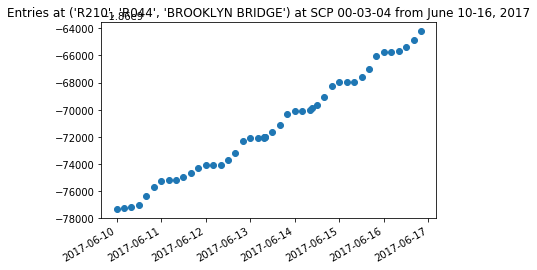

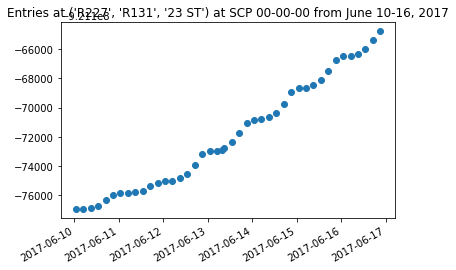

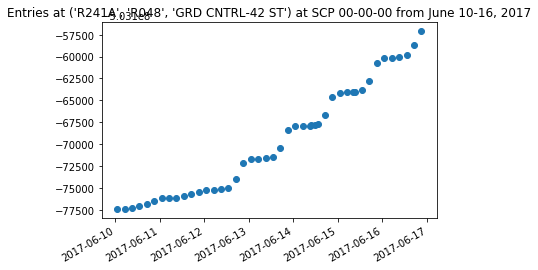

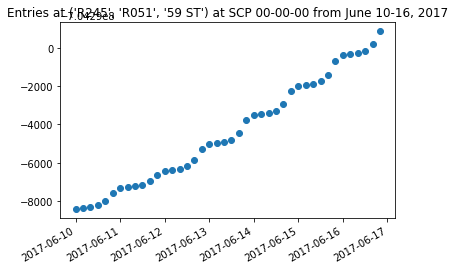

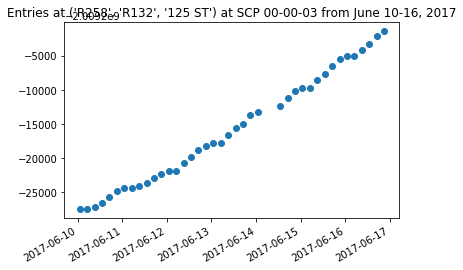

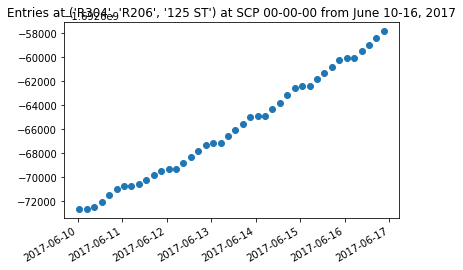

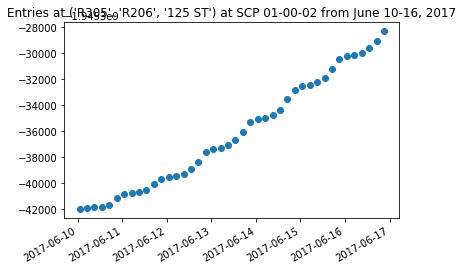

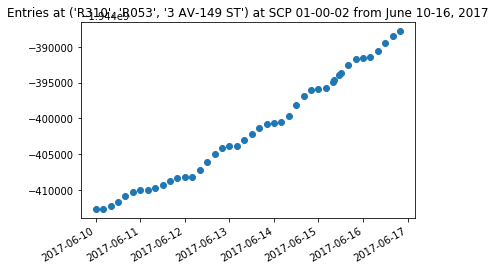

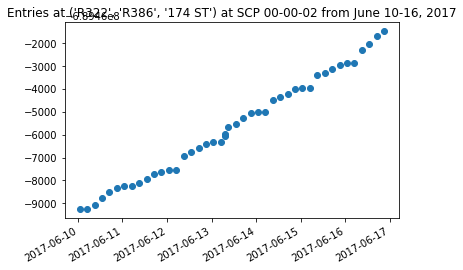

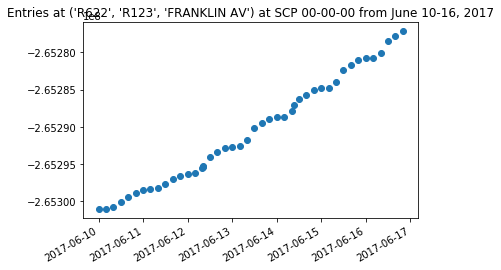

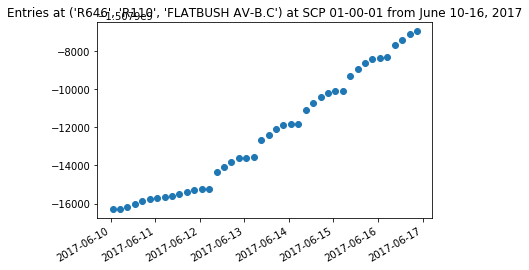

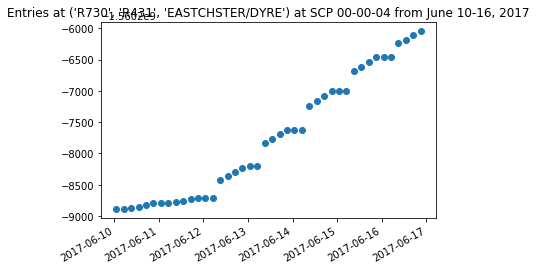

In [121]:
def isMonotoneDecrease(tup):
    '''Input: Tuple of (Station,SCP). 
    Output: True if this SCP has monotone property, but decreasing, False otherwise.'''
    n = len(bigDict[tup[0]][tup[1]])
    for i in range(n-1):
        if(bigDict[tup[0]][tup[1]][i+1][1]>bigDict[tup[0]][tup[1]][i][1]):
            return False
    return True

def fixMonotoneDecrease(tup):
    '''reflects the data to fix it'''
    n = len(bigDict[tup[0]][tup[1]])
    for i in range(n):
        bigDict[tup[0]][tup[1]][i] = (bigDict[tup[0]][tup[1]][i][0],(-1)*bigDict[tup[0]][tup[1]][i][1])
    

monotoneDecreaseList = []
for k in trouble:
    for y in trouble[k]:
        tup = (k,y)
        if(isMonotoneDecrease(tup)):
            monotoneDecreaseList.append(tup)
print("Total Monotone Decrease:",len(monotoneDecreaseList))
for k in monotoneDecreaseList:
    fixMonotoneDecrease(k)
print("Problem Fixed!")

# print (monotoneDecreaseList)

for k in trouble:
    for y in trouble[k]:
        tup = (k,y)
        if(isMonotoneDecrease(tup)):
            monotoneDecreaseList.append(tup)
print("Total Monotone Decrease:",len(monotoneDecreaseList))
for k in monotoneDecreaseList:
    print (k[0], k[1])
    inspection(k[0], k[1])

#### Mistake Type II: Garbage Value - To fix this, remove the garbage value

17.Run the cell below to fix it:

Garbage Removed: 5


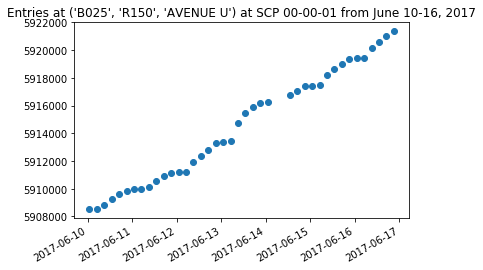

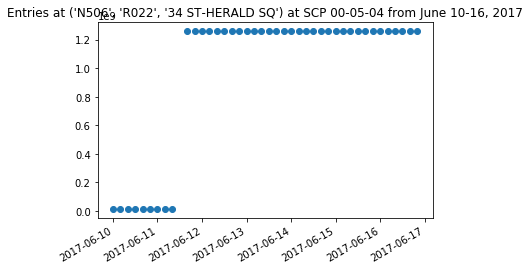

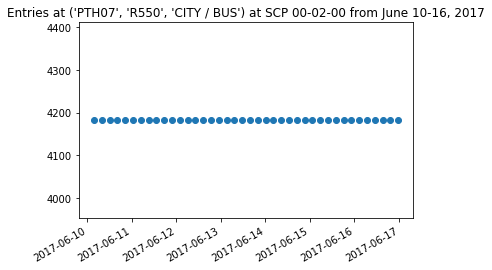

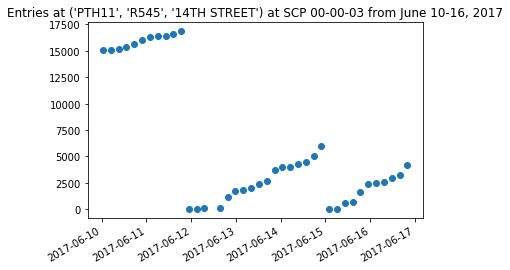

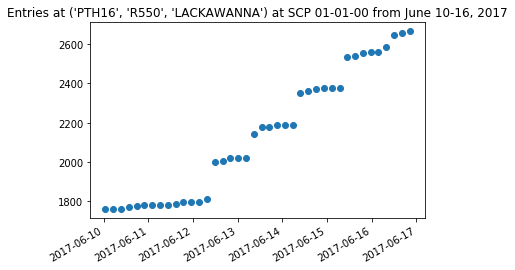

In [122]:
def garbageEliminator(tup):
    '''removes nonsensical isolated points'''
    n = len(bigDict[tup[0]][tup[1]])
    toDel = []
    for i in range(1,n-1):
        if((bigDict[tup[0]][tup[1]][i-1][1]>bigDict[tup[0]][tup[1]][i+1][1])):
            continue
        if((bigDict[tup[0]][tup[1]][i-1][1]<=bigDict[tup[0]][tup[1]][i][1]) and (bigDict[tup[0]][tup[1]][i][1]<=bigDict[tup[0]][tup[1]][i+1][1])):
            continue
        toDel.append(bigDict[tup[0]][tup[1]][i])
    #Deletion Process
    if(len(toDel)==0):
        return 0
    for k in toDel:
        bigDict[tup[0]][tup[1]].remove(k)
    return 1


#Driver
cnt = 0
healList = []
for k in trouble:
    for y in trouble[k]:
        tup = (k,y)
        if(garbageEliminator(tup)):
            healList.append(tup)
print("Garbage Removed:",len(healList))
for k in healList:
    inspection(k[0], k[1])

#### Mistake Type III: Turnstile Reset - To fix this, shift the data upwards.

18.Run the cell below to fix it:

Cleaned


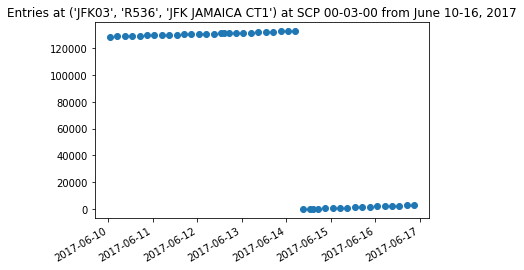

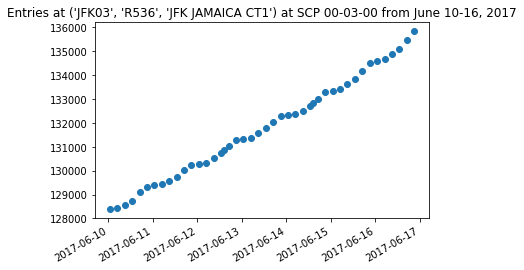

In [123]:
def dealingWithReset(tup):
    '''for counters that are reset, we fix the data by shifting it upwards'''
    sta = tup[0]
    tsl = tup[1]
    n = len(bigDict[sta][tsl])
    #Detecting Part
    resetPoint = [] # it means (i,i+1) is reset
    resetSet = []
    for i in range(1,n-2):
        if(bigDict[sta][tsl][i][1]<=bigDict[sta][tsl][i+1][1]):
            continue #We don't need to change this one
        resetPoint.append(i)
    #Fixing Part
    resetSet = set(resetPoint)
    cumulative = 0
    for i in range(n-2):
        if(i not in resetSet):
            bigDict[sta][tsl][i] = (bigDict[sta][tsl][i][0],bigDict[sta][tsl][i][1]+cumulative)
            continue
        #Problem
        expected = (bigDict[sta][tsl][i][1]-bigDict[sta][tsl][i-1][1])+ (bigDict[sta][tsl][i+2][1]-bigDict[sta][tsl][i+1][1])
        expected = int(expected/2)
        shift = (bigDict[sta][tsl][i][1]+expected)-bigDict[sta][tsl][i+1][1]
        cumulative = shift
    for i in range(n-2,n):
        bigDict[sta][tsl][i] = (bigDict[sta][tsl][i][0],bigDict[sta][tsl][i][1]+cumulative)
    #Done!
    
#Test Usage
inspection(('JFK03', 'R536', 'JFK JAMAICA CT1'), '00-03-00')
dealingWithReset((('JFK03', 'R536', 'JFK JAMAICA CT1'), '00-03-00'))
print("Cleaned")
inspection(('JFK03', 'R536', 'JFK JAMAICA CT1'), '00-03-00')

## Overall Cleaning Process
19.This next cell does all of the previous cleanup in one cell. Run the cell below:

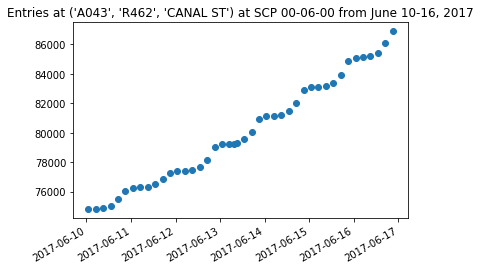

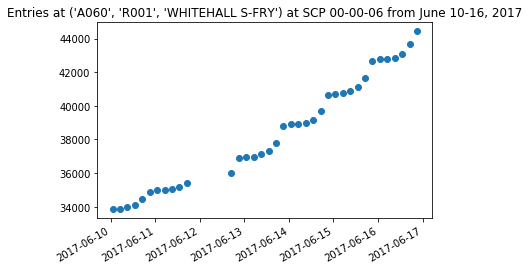

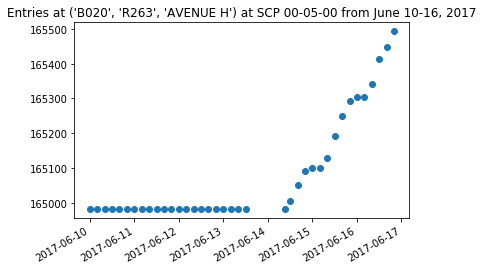

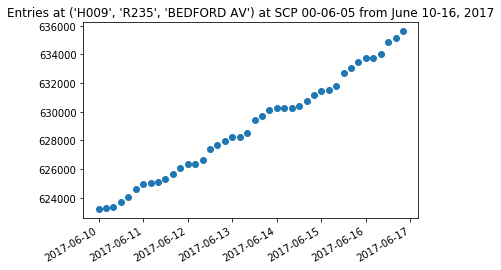

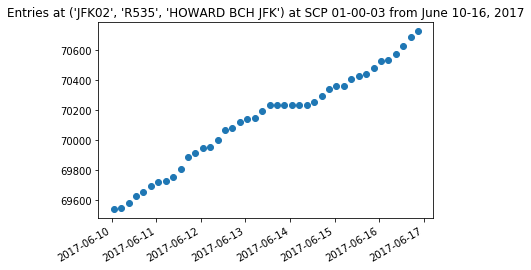

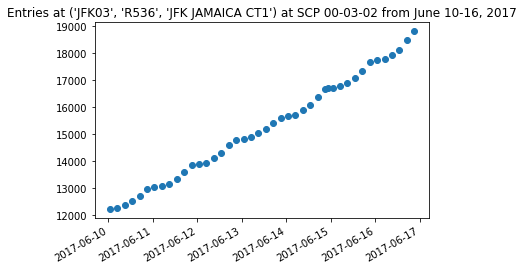

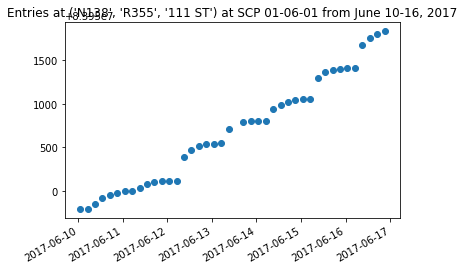

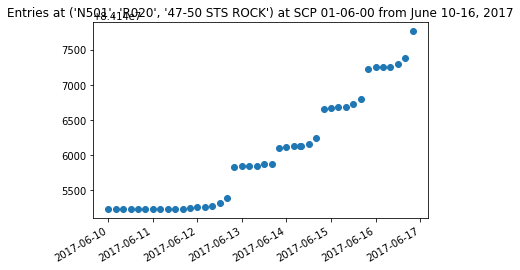

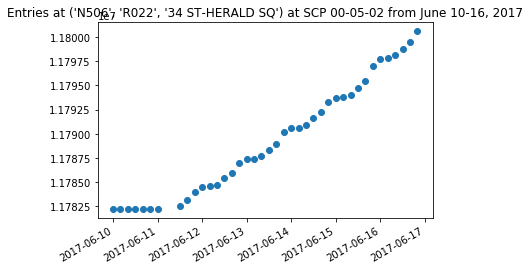

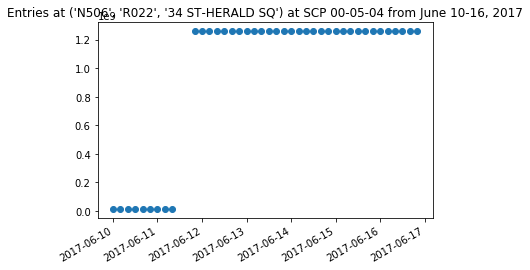

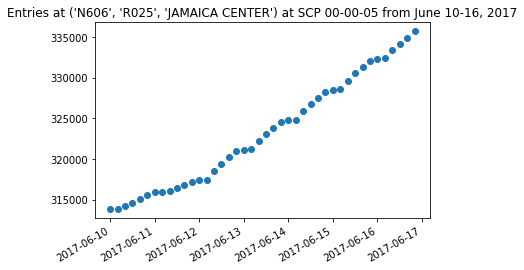

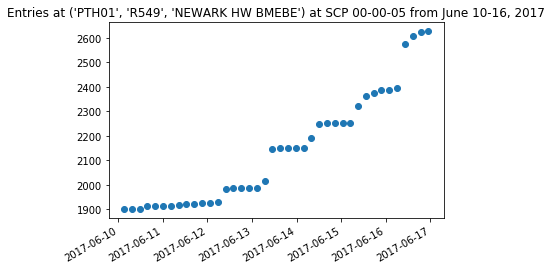

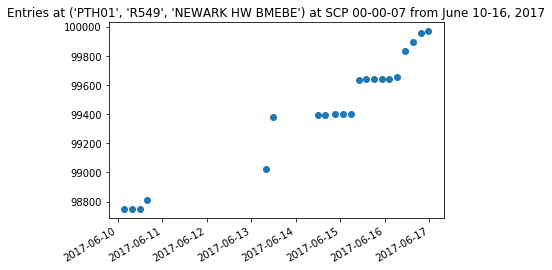

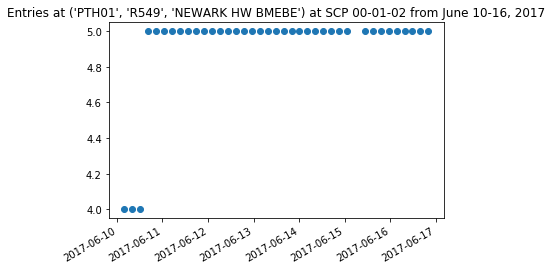

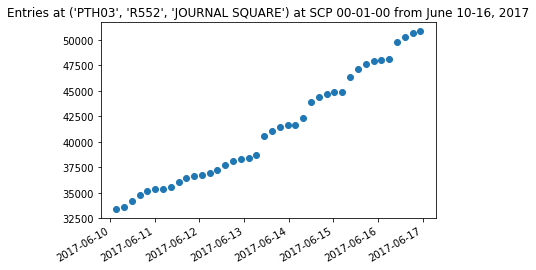

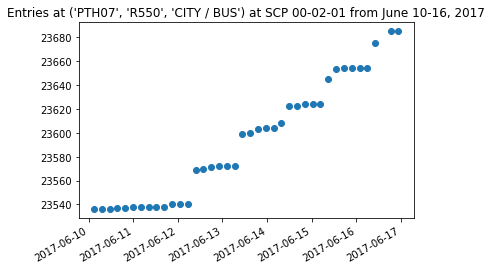

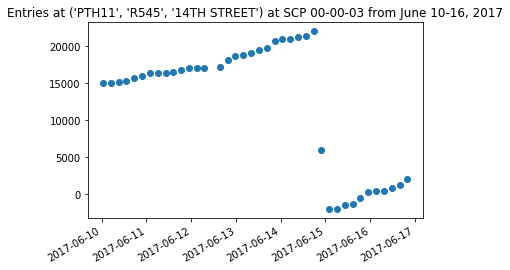

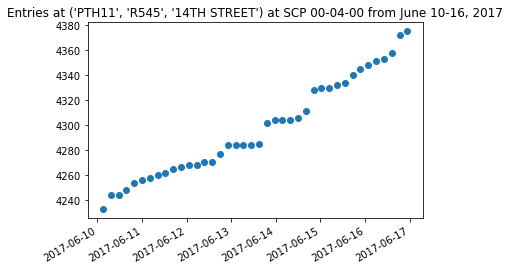

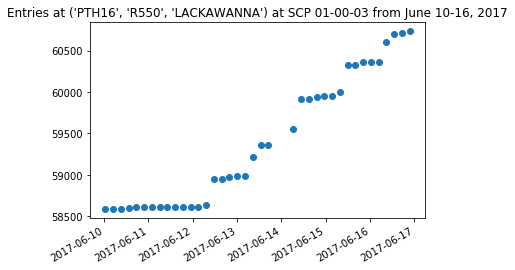

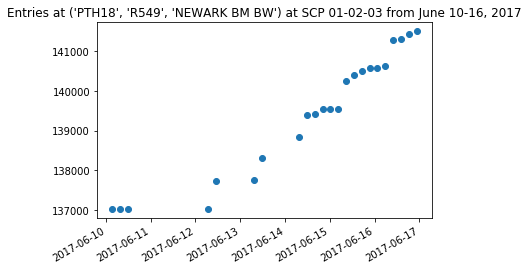

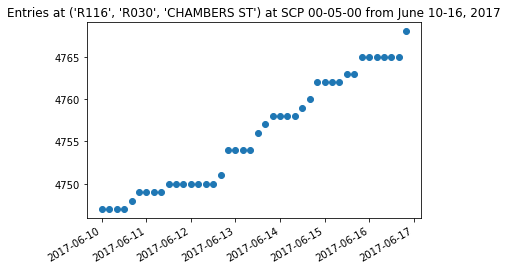

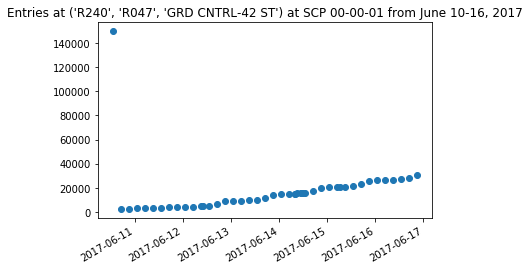

In [124]:
toClean = {}
for st,stv in bigDict.items():
    for scp,lst in stv.items():
        #Cleaning in Each LIST of turnstile
        toDel = []
        n = len(lst)
        lst.sort()
        for i in range(1,n-1):
            if(lst[i-1][1]<=lst[i][1] and lst[i][1]<=lst[i+1][1]): #What we expected Data to be (Non-Decreasing)
                continue

            key = (st,scp)
            toClean[key] = trouble.get(key,0)+1
            
for k in toClean.keys():
    if(isMonotoneDecrease(k)):
        fixMonotoneDecrease(k)
    garbageEliminator(k)
    dealingWithReset(k)
    inspection(k[0], k[1])

20.Which troublesome stations are left?

In [125]:
trouble = {}
for st,stv in bigDict.items():
    for scp,lst in stv.items():
        #Cleaning in Each LIST of turnstile
        toDel = []
        n = len(lst)
        lst.sort()
        for i in range(1,n-1):
            if(lst[i-1][1]<=lst[i][1] and lst[i][1]<=lst[i+1][1]): #What we expected Data to be (Non-Decreasing)
                continue
                
            key = (st,scp)
            trouble[key] = trouble.get(key,0)+1
print("Trouble List: ",len(trouble.keys()))
for k,v in trouble.items():
    print(k,v)

Trouble List:  3
(('N506', 'R022', '34 ST-HERALD SQ'), '00-05-04') 27
(('PTH11', 'R545', '14TH STREET'), '00-00-03') 3
(('R240', 'R047', 'GRD CNTRL-42 ST'), '00-00-01') 1


21.Delete these two keys from bigDict manually:

In [126]:
#insert 21
for k,v in trouble.items():
    outkey = k[0]
    scp = k[1]
    try:
        del bigDict[outkey][scp]
    except:
        print(k)
# del bigDict[('PTH11', 'R545', '14TH STREET')]['00-00-03']
# del bigDict[('R240', 'R047', 'GRD CNTRL-42 ST')]['00-00-01']


22.The data is now all cleaned, so let's save it so that we don't have to run all of the above code every time. Use the pickle package to save bigDict as an "MTAdict.pkl" file.

In [127]:
#insert 22
import dill as pickle
output = open('MTAdict.pkl', 'wb')
pickle.dump(bigDict, output)
output.close()

# --At this point, the data is ready to use and so we are ready for data analysis.--
23.Let's read the cleaned data file back in and save it as bigDict.

In [128]:
#insert 23
import dill as pickle
pkl_file = open('MTAdict.pkl', 'rb')
bigDict = pickle.load(pkl_file)
pkl_file.close()

24.Create a function called turnstileRiders that takes in a single turnstile's date/exit info and a start and endtime (in datetime format) and returns the number of riders through that turnstile within that time period. As an extension, you may want to use a linear approximation in the case of incomplete information. 

For instance, the input 
```python
t1 = dt.strptime("2017-06-12 00:00:00","%Y-%m-%d %H:%M:%S")
t2 = dt.strptime("2017-06-13 00:00:00","%Y-%m-%d %H:%M:%S")
turnstileRiders(bigDict[('R204', 'R043', 'WALL ST')]["02-00-00"],t1,t2)
```

should output 1419 riders.

In [129]:
#insert 24
t1 = datetime.datetime.strptime("2017-06-12 00:00:00","%Y-%m-%d %H:%M:%S")
t2 = datetime.datetime.strptime("2017-06-13 00:00:00","%Y-%m-%d %H:%M:%S")

# t1 = "2017-06-12 00:00:00"
# t2 = "2017-06-13 00:00:00"


def turnstileRiders(tup, t1, t2):
    dates = list()
    for x in tup:
        if t1 <= x[0] < t2:
            dates.append(x[1])
    return (dates[-1] - dates[0])

turnstileRiders(bigDict[('R204', 'R043', 'WALL ST')]["02-00-00"],t1,t2)

634

25.Create a function called stationRiders that calls the turnstileRiders function for each turnstile in a  (C/A,UNIT,STATION) station area and tallies all of the riders through that area between two times.

For example, an input of 
```python
getStationRangeRider(bigDict[('R204', 'R043', 'WALL ST')],dt(2017,6,12,0,0,0),dt(2017,6,13,0,0,0))
```
should output 9507 riders.

In [130]:
#insert 25
def stationRiders(outkey, t1, t2):
    turnstilecounts = []
    for scp in outkey.keys():
        turnstilecounts.append(turnstileRiders(outkey[scp], t1, t2))
    return (sum(turnstilecounts))
        
stationRiders(bigDict[('R204', 'R043', 'WALL ST')],datetime.datetime(2017,6,12,0,0,0),datetime.datetime(2017,6,13,0,0,0))

3532

26.There are still several station areas within a station. Make a plot of the day of the week versus the number of total station rider exits for the ENTIRE Wall St station.

Text(0.5, 1.0, 'Exits at WALL ST from June 10-16, 2017')

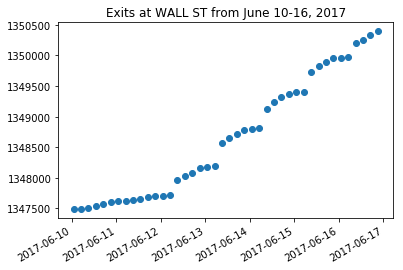

In [131]:
#insert 26
dates=[]
values=[]
for outkey in bigDict.keys():
    if outkey[2] == 'WALL ST':
        for y in bigDict[outkey]:
            value = bigDict[x][y]
            for i in value:
                if i[0] not in dates:
                    dates.append(i[0])
                    values.append(i[1])
                if i[0] in dates:
                    values[dates.index(i[0])] + i[1]
fig, ax = plt.subplots()
ax.plot_date(dates, values)
fig.autofmt_xdate()
plt.title(f'Exits at WALL ST from June 10-16, 2017')

27.Sort by busiest station areas during 6/12 midnight - 6/13 midnight in descending order by creating a list of sorted tuples:

In [132]:
#insert 27
import operator
t1 = datetime.datetime.strptime("2017-06-12 00:00:00","%Y-%m-%d %H:%M:%S")
t2 = datetime.datetime.strptime("2017-06-13 00:00:00","%Y-%m-%d %H:%M:%S")

wallst = {}
for outkey in bigDict.keys():
    total = 0
    if outkey[2] == 'WALL ST':
        
        for y in bigDict[outkey]:
            value = bigDict[outkey][y]
            total += turnstileRiders(value, t1, t2)
        if (outkey[0], outkey[1]) in wallst.keys():
            wallst[(outkey[0], outkey[1])] = wallst[(outkey[0], outkey[1])] + total
        if (outkey[0], outkey[1]) not in wallst.keys():
            wallst[(outkey[0], outkey[1])] = total
        
        wallst[(outkey[0],outkey[1])] = total
sorted_wallst = sorted(wallst.items(), key=operator.itemgetter(1), reverse = True)
dict(sorted_wallst)
            

{('R203', 'R043'): 15123,
 ('R110', 'R027'): 9998,
 ('R111', 'R027'): 8148,
 ('R112', 'R027'): 4194,
 ('R112A', 'R027'): 3629,
 ('R204', 'R043'): 3532,
 ('R203A', 'R043'): 936,
 ('R204A', 'R043'): 692}

28.Make a dictionary called total_dict that contains the station name as its key and the total number of riders through all of its station areas between 6/12-6/13 as its value. Then create a sorted list of tuples to view the busiest stations on that day.

In [133]:
#insert 28
import operator
t1 = datetime.datetime.strptime("2017-06-12 00:00:00","%Y-%m-%d %H:%M:%S")
t2 = datetime.datetime.strptime("2017-06-13 00:00:00","%Y-%m-%d %H:%M:%S")

total_dict = {}
for x in bigDict.keys():
    wallst = {}
    for outkey in bigDict.keys():
        total = 0
        if outkey[2] == x[2]:
            for y in bigDict[outkey]:
                value = bigDict[outkey][y]
                try:
                    total += turnstileRiders(value, t1, t2)
                except IndexError:
                    pass
            if (outkey[0], outkey[1]) in wallst.keys():
                wallst[(outkey[0], outkey[1])] = wallst[(outkey[0], outkey[1])] + total
            if (outkey[0], outkey[1]) not in wallst.keys():
                wallst[(outkey[0], outkey[1])] = total

            wallst[(outkey[0],outkey[1])] = total
    total_dict[x[2]] = sum(wallst.values())

sorted_total = sorted(total_dict.items(), key=operator.itemgetter(1), reverse = True)
sorted_total = dict(sorted_total)
sorted_total

{'34 ST-PENN STA': 155819,
 'GRD CNTRL-42 ST': 140327,
 '34 ST-HERALD SQ': 105670,
 '23 ST': 102595,
 'FULTON ST': 93555,
 '42 ST-PORT AUTH': 93207,
 '14 ST-UNION SQ': 91101,
 'TIMES SQ-42 ST': 85761,
 '86 ST': 78939,
 '125 ST': 72772,
 '59 ST': 71398,
 'CANAL ST': 66264,
 '96 ST': 60407,
 '59 ST COLUMBUS': 59108,
 'CHAMBERS ST': 58483,
 'FLUSHING-MAIN': 55344,
 'PATH NEW WTC': 54940,
 '47-50 STS ROCK': 52534,
 '14 ST': 51191,
 'JKSN HT-ROOSVLT': 46479,
 'WALL ST': 46252,
 '28 ST': 44873,
 '72 ST': 43025,
 '50 ST': 42350,
 'LEXINGTON AV/53': 39667,
 'ATL AV-BARCLAY': 38698,
 'JAY ST-METROTEC': 38290,
 'JAMAICA CENTER': 38010,
 '42 ST-BRYANT PK': 37395,
 '7 AV': 36519,
 'CHURCH AV': 35659,
 'BOROUGH HALL': 34385,
 'W 4 ST-WASH SQ': 33605,
 '145 ST': 33531,
 '77 ST': 32612,
 '116 ST': 32289,
 '8 AV': 31702,
 'BOWLING GREEN': 31250,
 'DEKALB AV': 30299,
 'CROWN HTS-UTICA': 30204,
 '103 ST': 29731,
 'KINGS HWY': 29201,
 '57 ST-7 AV': 29036,
 'GRAND ST': 27948,
 '33 ST': 27639,
 'KEW GARDEN

29.Make a histogram of those station totals:

In [134]:
top10station = []
top10values = []
for key in sorted(sorted_total.items(), key=operator.itemgetter(1), reverse = True)[0:10]:
    stationname = key[0]
    value = key[1]
    top10station.append(stationname)
    top10values.append(value)
top10station

['34 ST-PENN STA',
 'GRD CNTRL-42 ST',
 '34 ST-HERALD SQ',
 '23 ST',
 'FULTON ST',
 '42 ST-PORT AUTH',
 '14 ST-UNION SQ',
 'TIMES SQ-42 ST',
 '86 ST',
 '125 ST']

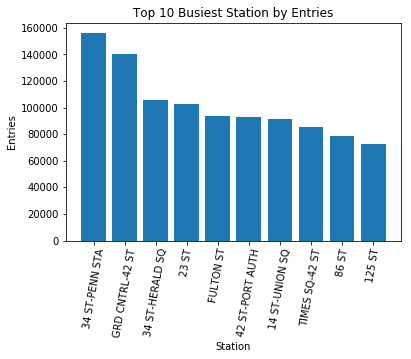

In [135]:
#insert 29
plt.bar(top10station, top10values, align='center')
plt.xticks(rotation=80)
plt.title('Top 10 Busiest Station by Entries')
plt.xlabel('Station')
plt.ylabel('Entries')
plt.show()

30.Create a commuter index to be the average weekday exits divided by the sum of the avg weekday exits + avg weekend exits. To do this, first make a function called isWeekday that returns True if the datetime input is a weekday and False if it isn't.

In [136]:
#insert 31
def isWeekday(day):
    return day.weekday() < 5

isWeekday(datetime.datetime(2017,6,12,0,0,0))


True

31.Make a function called commuterIndex that inputs a (C/A,UNIT,STATION) tuple and outputs its commuter index. 

For example, the output of 
```python
getCommuteIndex(('PTH11', 'R545', '14TH STREET'))
```
should be 0.663.

In [137]:
#insert 31

def commuterIndex(tup):
    scp = bigDict[tup]
    dateandvalues = bigDict[tup]
    t1weekend = datetime.datetime.strptime("2017-06-9 00:00:00","%Y-%m-%d %H:%M:%S")
    t2weekend = datetime.datetime.strptime("2017-06-12 00:00:00","%Y-%m-%d %H:%M:%S")
    weekend = stationRiders(dateandvalues, t1weekend, t2weekend)
    
    t1weekday = datetime.datetime.strptime("2017-06-12 00:00:00","%Y-%m-%d %H:%M:%S")
    t2weekday = datetime.datetime.strptime("2017-06-17 00:00:00","%Y-%m-%d %H:%M:%S")
    weekday = stationRiders(dateandvalues, t1weekday, t2weekday)
    
    weekendavg = weekend/2.
    weekdayavg = weekday/5.
    return (weekdayavg / (weekdayavg + weekendavg))

commuterIndex(('PTH11', 'R545', '14TH STREET'))

0.6598572644536109

32.Create a sorted list of tuples in descending order containing the commuter index and the station area tuple.

In [138]:
#insert 32
indexdict = {}
for x in bigDict.keys():
    try:
        i = commuterIndex(x)
    except:
        pass
    indexdict[x] = i
indexdict = sorted(indexdict.items(), key=operator.itemgetter(1), reverse = True)
indexdict = dict(indexdict)
indexdict

/Users/fangd/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


{('R203A', 'R043', 'WALL ST'): 1.0,
 ('R237', 'R046', 'GRD CNTRL-42 ST'): 1.0,
 ('A069', 'R044', 'CHAMBERS ST'): 0.9999212406657669,
 ('N508', 'R453', '23 ST'): 0.9976191033777507,
 ('N539A', 'R288', '7 AV'): 0.9932149502715318,
 ('E016', 'R400', 'BAY 50 ST'): 0.9732721212502359,
 ('E015', 'R399', '25 AV'): 0.9721329976560465,
 ('N511', 'R163', '14 ST'): 0.8748918165208193,
 ('A071', 'R044', 'CHAMBERS ST'): 0.862398227442981,
 ('N504', 'R021', '42 ST-BRYANT PK'): 0.8095446491925034,
 ('A021', 'R032', 'TIMES SQ-42 ST'): 0.7934236475170205,
 ('A077', 'R028', 'FULTON ST'): 0.7907794852805036,
 ('A082', 'R028', 'FULTON ST'): 0.7839489768801489,
 ('A035', 'R170', '14 ST-UNION SQ'): 0.7580822359265824,
 ('N510', 'R163', '14 ST'): 0.7553541859999636,
 ('N507', 'R023', '34 ST-HERALD SQ'): 0.7551314751792197,
 ('N502', 'R021', '42 ST-BRYANT PK'): 0.7531162101424902,
 ('N505', 'R022', '34 ST-HERALD SQ'): 0.7501750386713344,
 ('K024', 'R403', 'FOREST AVE'): 0.7470450821101078,
 ('K017', 'R401', '

33.Remember that there are still several station areas within each station. Let's get all of the commuter indexes for each station area and then take the median of that commuter index to assign to the entire station. Create a sorted list of tuples in descending order containing the median commuter index and the station name.

In [139]:
#insert 33
import statistics
medianindex = {}
for x in indexdict.keys():
    medians = []
    for outkey in indexdict.keys():
        if outkey[2] == x[2]:
            medians.append(indexdict[outkey])
#     print(x[2], medians)
    medianindex[x[2]] = statistics.median(medians)

medianindex = sorted(medianindex.items(), key=operator.itemgetter(1), reverse = True)
medianindex = dict(medianindex)
medianindex

{'21 ST': 1.0,
 '25 AV': 0.9721329976560465,
 'VAN SICLEN AV': 0.8124587435276913,
 'FRESH POND RD': 0.7400640758429309,
 'HEWES ST': 0.7220129576615941,
 'BROAD ST': nan,
 'GREENPOINT AV': 0.9999445411892587,
 'NASSAU AV': 0.9994743666117671,
 'MYRTLE-WILLOUGH': 0.9970360069368118,
 'FLUSHING AV': 0.9951496674057649,
 'BAY 50 ST': 0.9732721212502359,
 'WALL ST': 0.9636394078405432,
 '36 ST': 0.9336253991713072,
 '5 AV/53 ST': 0.8654138674430536,
 'CHAMBERS ST': 0.862398227442981,
 'HIGH ST': 0.8516711585210968,
 '75 AV': 0.8302407333244337,
 'GRD CNTRL-42 ST': 0.8260972395850931,
 'LEXINGTON AV/53': 0.8063359169746324,
 'ELMHURST AV': 0.803052806310298,
 'BROADWAY': 0.7902708550993591,
 'FULTON ST': 0.7877951381160299,
 '47-50 STS ROCK': 0.7854261274768894,
 '67 AV': 0.7767901666069411,
 'BRIARWOOD': 0.7767393561786086,
 'UNION ST': 0.7642175019313984,
 '42 ST-BRYANT PK': 0.7531162101424902,
 'FOREST AVE': 0.7470450821101078,
 'CENTRAL AV': 0.7455741603851391,
 'GRAND-NEWTOWN': 0.7402

In [140]:
# Modified Commuter Index, weighted on total exits
import statistics 

def modifiedcommuterIndex(tup):
    scp = bigDict[tup]
    dateandvalues = bigDict[tup]
    t1weekend = datetime.datetime.strptime("2017-06-9 00:00:00","%Y-%m-%d %H:%M:%S")
    t2weekend = datetime.datetime.strptime("2017-06-12 00:00:00","%Y-%m-%d %H:%M:%S")
    weekend = stationRiders(dateandvalues, t1weekend, t2weekend)
    
    t1weekday = datetime.datetime.strptime("2017-06-12 00:00:00","%Y-%m-%d %H:%M:%S")
    t2weekday = datetime.datetime.strptime("2017-06-17 00:00:00","%Y-%m-%d %H:%M:%S")
    weekday = stationRiders(dateandvalues, t1weekday, t2weekday)
    
    weekendavg = weekend/2.
    weekdayavg = weekday/5.
    totaltraffic = sorted_total[tup[2]]
    return (weekdayavg / (weekdayavg + weekendavg)) * totaltraffic
# modifiedcommuterIndex(('PTH11', 'R545', '14TH STREET'))

modifiedindexdict = {}
for x in bigDict.keys():
    try:
        i = modifiedcommuterIndex(x)
    except:
        pass
    modifiedindexdict[x] = i
modifiedindexdict = sorted(modifiedindexdict.items(), key=operator.itemgetter(1), reverse = True)
modifiedindexdict = dict(modifiedindexdict)


median_modifiedindex = {}
for x in modifiedindexdict.keys():
    medians = []
    for outkey in modifiedindexdict.keys():
        if outkey[2] == x[2]:
            medians.append(modifiedindexdict[outkey])
#     print(x[2], medians)
    median_modifiedindex[x[2]] = statistics.median(medians)

median_modifiedindex = sorted(median_modifiedindex.items(), key=operator.itemgetter(1), reverse = True)
median_modifiedindex = dict(median_modifiedindex)

# modifiedindexdict
median_modifiedindex

/Users/fangd/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


{'GRD CNTRL-42 ST': 115923.74733925736,
 '23 ST': 74970.42074868515,
 'FULTON ST': 73702.17414644518,
 '34 ST-HERALD SQ': 71080.3907426488,
 'TIMES SQ-42 ST': 61081.163806385135,
 '14 ST-UNION SQ': 57677.61486725254,
 '86 ST': 52030.920941807046,
 'CHAMBERS ST': 50435.63553554786,
 '59 ST': 48128.30055944588,
 'CANAL ST': 41675.53732803905,
 '28 ST': 32123.04751965372,
 '50 ST': 27598.04012558993,
 'KINGS HWY': 19746.467054433677,
 'DEKALB AV': 19346.564672999983,
 '57 ST-7 AV': 18510.7290864701,
 '8 AV': 18247.021246182932,
 'WOODHAVEN BLVD': 17825.332954951693,
 'GRAND ST': 17260.533763696596,
 'DELANCEY/ESSEX': 13485.49369531652,
 '49 ST': 13371.834633565688,
 '181 ST': 12782.770270594734,
 '79 ST': 12663.593996797568,
 'CORTLANDT ST': 11636.276430442424,
 'BEDFORD AV': 11575.756992064917,
 '111 ST': 11559.868502827545,
 'WHITEHALL S-FRY': 11297.98028901784,
 'CONEY IS-STILLW': 11164.93383599097,
 'MYRTLE-WYCKOFF': 10908.612809749775,
 'RECTOR ST': 10900.325208736038,
 '1 AV': 10631

### How can you use what you have done so far to make decisions about MTA advertising???